In [1]:
from facetorch import FaceAnalyzer
from facetorch.analyzer.utilizer import LandmarkDrawerTorch
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np

## Configure

In [2]:
path_img_input="../Dataset/Labeled_Faces_in_the_Wild/lfw-deepfunneled/lfw-deepfunneled/Bill_Gates/Bill_Gates_0010.jpg"
path_img_output="test_output.jpg"
path_config="../Pre-processing/gpu.config.yml"


cfg = OmegaConf.load(path_config)

## Startup

In [3]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)


{"asctime": "2024-10-22 22:24:29,162", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-10-22 22:24:29,162", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-10-22 22:24:29,383", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2024-10-22 22:24:30,095", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-10-22 22:24:30,108", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-10-22 22:24:30,109", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
{"asctime": "2024-10-22 22:24:30,347", "levelname": "INFO", "message": "Initializing FacePredictor verify"}
{"asctime": "2024-10-22 22:24:32,091", "levelname": "INFO", "message": "Initializing FacePredictor au"}
{"asctime": "2024-10-22 22:24:32,796", "levelname": "INFO", "message": "Initializing FacePredictor va"}
{"asctime": "2024-10-22 22:24:32,845", "levelname": "INFO", "message": 

## Inference

In [4]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )


{"asctime": "2024-10-22 22:24:33,123", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-10-22 22:24:33,124", "levelname": "INFO", "message": "Reading image", "input": "../Dataset/Labeled_Faces_in_the_Wild/lfw-deepfunneled/lfw-deepfunneled/Bill_Gates/Bill_Gates_0010.jpg"}
{"asctime": "2024-10-22 22:24:33,204", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-10-22 22:24:34,266", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-10-22 22:24:34,266", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-10-22 22:24:34,279", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-10-22 22:24:34,280", "levelname": "INFO", "message": "Running FacePredictor: embed"}
c:\Users\46737\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1541: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT

In [5]:
response.faces[0].tensor.shape

torch.Size([3, 380, 380])

## Output image

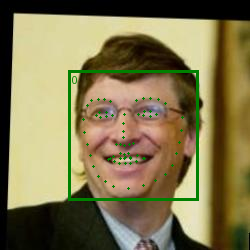

In [6]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

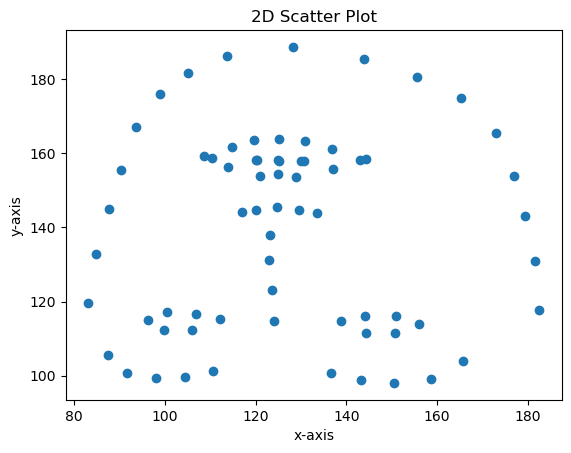

In [7]:


pts = [face.preds["align"].other["lmk3d"].cpu() for face in response.faces]


# data = normalize(pts[0])
data = pts[0]

norm = np.linalg.norm(data)  # Calculate the L2 norm of the data
normalized_data = data / norm

# Extract the first two columns for 2D scatter plot
x = data[0,:]  # First column (x)
y = data[1,:]  # Second column (y)
z = data[2,:]  # Third column (z)

# Create the 2D scatter plot
plt.scatter(x, y)
# print(len(z))

# Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('2D Scatter Plot')

# Display the plot
plt.show()


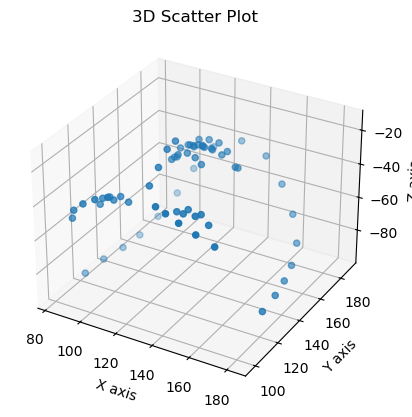

In [8]:
data = pts[0]

# Extract the three columns for 3D scatter plot
x = data[0,:]  # First column (x)
y = data[1,:]  # Second column (y)
z = data[2,:]  # Third column (z)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Create the 3D scatter plot
ax.scatter(x, y, z)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Scatter Plot')

# Display the plot
plt.show()

## Rotation

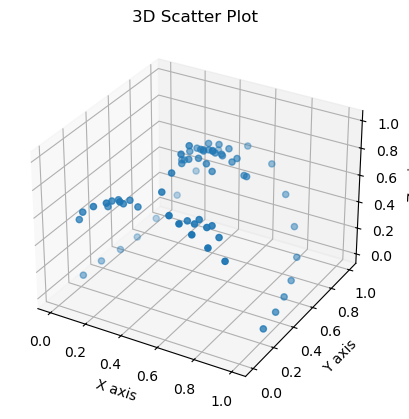

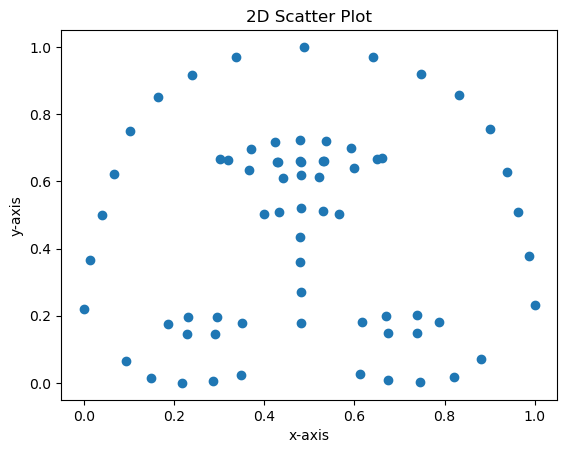

In [9]:
from scipy.spatial.transform import Rotation as R
from sklearn.preprocessing import MinMaxScaler
from utils import rotate_face, min_max_scale_data


face_tensor_orgin = min_max_scale_data(rotate_face(pts[0]))

def plot_3d_2d_scatter(face_tensor_origin):
    # Extract the x, y, z coordinates
    x = face_tensor_origin[:, 0]  # First column (x)
    y = face_tensor_origin[:, 1]  # Second column (y)
    z = face_tensor_origin[:, 2]  # Third column (z)

    # 3D scatter plot
    fig_3d = plt.figure()
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    ax_3d.scatter(x, y, z)
    ax_3d.set_xlabel('X axis')
    ax_3d.set_ylabel('Y axis')
    ax_3d.set_zlabel('Z axis')
    plt.title('3D Scatter Plot')

    # 2D scatter plot
    fig_2d = plt.figure()
    plt.scatter(x, y)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('2D Scatter Plot')

    # Show both plots
    plt.show()


plot_3d_2d_scatter(face_tensor_origin=face_tensor_orgin)


## FFT

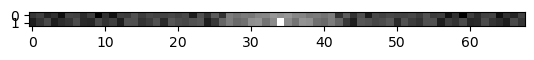

In [10]:
arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

arrTwoDim = arr[:-1]

norm = np.linalg.norm(arrTwoDim)  # Calculate the L2 norm of the data
normalized_data = arrTwoDim / norm
transformed = np.fft.fft2(normalized_data)
transformedShifted = np.fft.fftshift(transformed)
logAbs = np.log(np.abs(transformedShifted))
plt.imshow(logAbs, cmap='gray')
plt.show()


(3, 68)


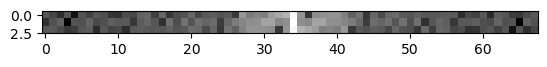

torch.Size([3, 68])

In [11]:
arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

print(arr.shape)
norm = np.linalg.norm(arr)  # Calculate the L2 norm of the data
normalized_data = arr / norm
transformed = np.fft.fftn(normalized_data)
transformedShifted = np.fft.fftshift(transformed)
logAbs = np.log(np.abs(transformedShifted))
plt.imshow(logAbs, cmap='gray')
plt.show()
logAbs = torch.from_numpy(logAbs)

logAbs.shape

In [12]:
face1 = './dataset/face_dataset/Abdullah_Gul/Abdullah_Gul0.jpg'

analyzer = FaceAnalyzer(cfg.analyzer)

response1 = analyzer.run(
        path_image=face1,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )

{"asctime": "2024-10-22 22:24:50,232", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-10-22 22:24:50,233", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-10-22 22:24:50,242", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2024-10-22 22:24:50,545", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-10-22 22:24:50,555", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-10-22 22:24:50,555", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
{"asctime": "2024-10-22 22:24:50,888", "levelname": "INFO", "message": "Initializing FacePredictor verify"}
{"asctime": "2024-10-22 22:24:54,713", "levelname": "INFO", "message": "Initializing FacePredictor au"}
{"asctime": "2024-10-22 22:24:55,194", "levelname": "INFO", "message": "Initializing FacePredictor va"}
{"asctime": "2024-10-22 22:24:55,231", "levelname": "INFO", "message": 

torch.Size([3, 68])


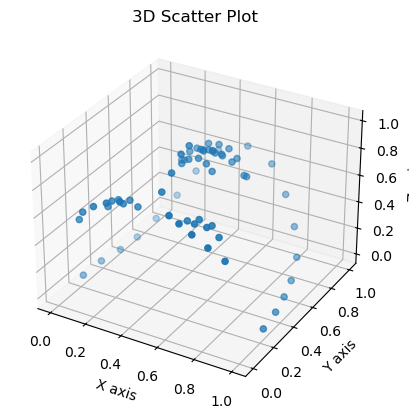

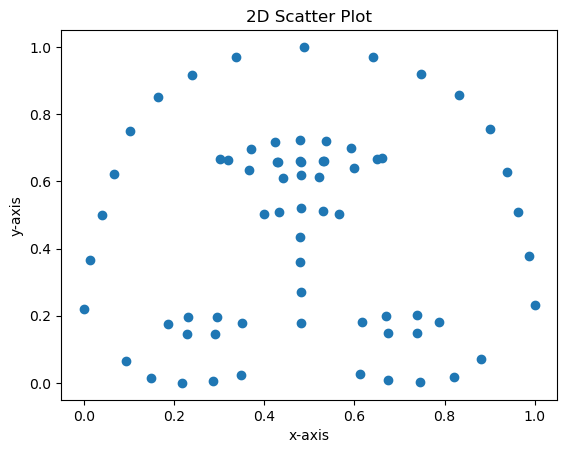

In [36]:


pts1 = [face.preds["align"].other["lmk3d"].cpu() for face in response1.faces]
data = pts[0].reshape(-1).tolist()

# RECONSTRUCT DATA
data_tensor = torch.tensor(data)
data_restructured = torch.zeros(size=(3,68)) 
data_restructured[0, :] = data_tensor[0:68]
data_restructured[1, :] = data_tensor[68:136]
data_restructured[2, :] = data_tensor[136:204]
plot_3d_2d_scatter(min_max_scale_data(rotate_face(data_restructured)))

## Shape Descriptors

### Geometric Features